In [1]:
trainingKey = "56bed0ba9d8d43bc91b3bab5c31c5743"
predictionKey = "08736be33b61497dab3fe3539a46d452"
trainingEndpoint = "https://southcentralus.api.cognitive.microsoft.com/customvision/v2.2/Training/"
predictionEndpoint = "https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/"

In [3]:
!pip install azure-cognitiveservices-vision-customvision --quiet

In [30]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

ENDPOINT = "https://southcentralus.api.cognitive.microsoft.com"

trainer = CustomVisionTrainingClient(trainingKey, endpoint=ENDPOINT)

# Create a new project
print ("Creating project...")
project = trainer.create_project("ClothesClassification")
print("Project created")

Creating project...
Project created


In [31]:
# Make two tags in the new project
hardshellTag = trainer.create_tag(project.id, "Hardshell")
insulatedTag = trainer.create_tag(project.id, "Insulated")

In [32]:
import os
from PIL import Image

hardshellDir = "resizedGearImages/hardshell_jackets"
insulatedDir = "resizedGearImages/insulated_jackets"

print ("Adding images...")

print("Adding Hardshell Jackets")
for root, folders, files in os.walk(hardshellDir):
    for file in files:
        filePath = os.path.join(hardshellDir,file)
        with open(filePath, 'rb') as f:
            img = f.read()
        trainer.create_images_from_data(project.id, img, tag_ids=[ hardshellTag.id ])
        
print("Adding Insulated Jackets")
for root, folders, files in os.walk(insulatedDir):
    for file in files:
        filePath = os.path.join(insulatedDir,file)
        with open(filePath, 'rb') as f:
            img = f.read()
        trainer.create_images_from_data(project.id, img, tag_ids=[ insulatedTag.id ])
        
print("Images uploading complete")

Adding images...
Adding Hardshell Jackets
Adding Insulated Jackets
Images uploading complete


In [33]:
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed
Done!


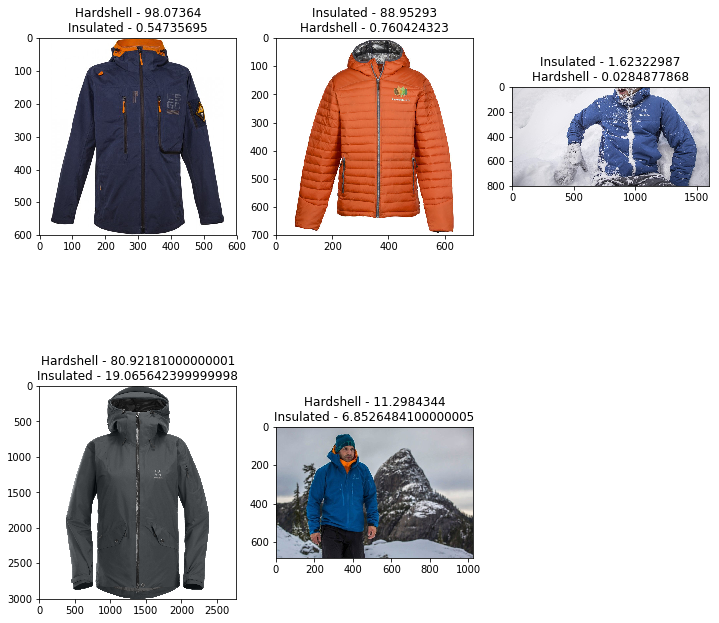

In [86]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
from urllib.request import urlopen
import requests
%matplotlib inline
# Now there is a trained endpoint that can be used to make a prediction

predictor = CustomVisionPredictionClient(predictionKey, endpoint=ENDPOINT)

images = ["https://d7jxqb4cmc1sh.cloudfront.net/media/catalog/product/cache/1/thumbnail/600x600/9df78eab33525d08d6e5fb8d27136e95/4/08/7408.jpg", 
         "https://cdna.4imprint.com/prod/700/505374.jpg",
         "https://www.rei.com/content/dam/images/Expert%20Advice/Migration/HeroImages/Bondi_010515_0009_Main_lg.jpg",
         "https://www.haglofs.com/dw/image/v2/BBTN_PRD/on/demandware.static/-/Sites-master-catalog-haglofs/default/dw8f15eca4/hi-res/6042023TJ_F18_2.jpg",
         "https://i.ebayimg.com/00/s/NjgzWDEwMjQ=/z/g10AAOSwGW9apPnq/$_86.JPG"]

fig = plt.figure(figsize=(12, 12))

i=1
# Display the results.
for image in images:
    results = predictor.predict_image_url(project.id, iteration.id, url= image)
    predictions = results.predictions
    img = Image.open(urlopen(image))
    a = fig.add_subplot(2,3,i)
    i+=1
    a.set_title(predictions[0].tag_name + " - " + str(predictions[0].probability*100)+"\n"+
               predictions[1].tag_name + " - " + str(predictions[1].probability*100))
    imgplot = plt.imshow(img)